# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



In [1]:
# Importing necessary libraries and functions :
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r"C:\Users\lenovo\Downloads\twitter csv.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
186034,0,1968206959,Fri May 29 20:58:21 PDT 2009,NO_QUERY,fwzynn,chibi nyaris kene langgar
1559283,4,2186035371,Mon Jun 15 18:15:47 PDT 2009,NO_QUERY,brooxieb,reflecting on my day ...
389328,0,2054431432,Sat Jun 06 07:20:16 PDT 2009,NO_QUERY,omgtanyapatdfan,the nightmares just wont go away!
880010,4,1685555513,Sun May 03 00:55:45 PDT 2009,NO_QUERY,kasey79,Beautiful Bad Girl...oh Danny it's like you ar...
940846,4,1794069351,Thu May 14 04:52:10 PDT 2009,NO_QUERY,Audexia,adam lambert is so gonna win American Idol!


In [3]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [4]:
# Display the number of records is our dataset :
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1600000 tweets


In [5]:
# Getting info about our dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


In [7]:
# Checking for Null values :
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


In [8]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [9]:
# Let's explore our target variable 'target'
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


In [10]:
# Replacing the values to ease understanding :
df['target'] = df['target'].replace(4,1)

In [11]:
# Exploring our date feature :
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 774363


In [12]:
# Exploring the flag feature :
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


In [13]:
# Explore the user feature :
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 659775


In [14]:
# Reviewing duplicates in tweet feature :
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1581466


In [15]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
1,800000,800000,800000,800000,800000


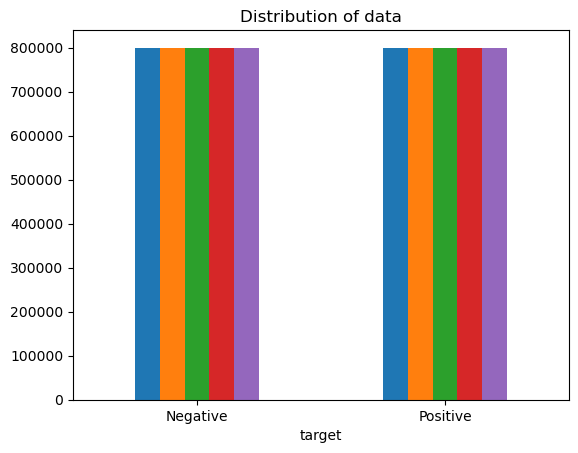

In [16]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

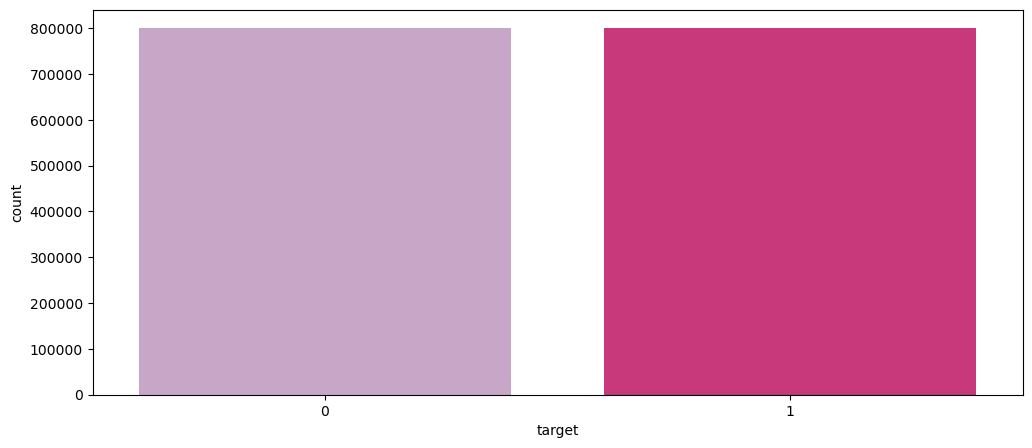

In [19]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

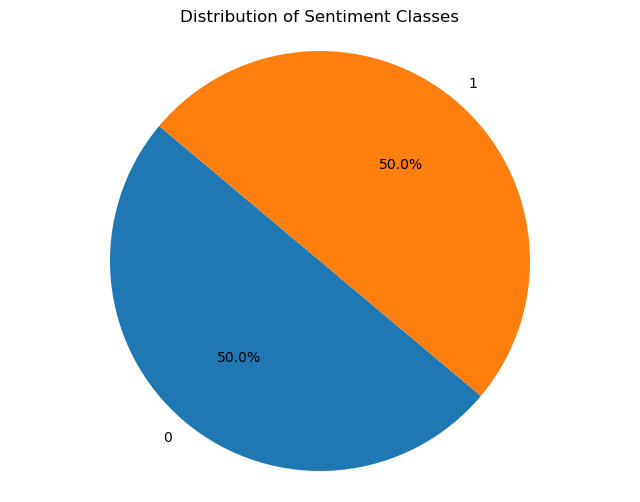

In [20]:
# Count the number of tweets for each sentiment class
sentiment_counts = df['target'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

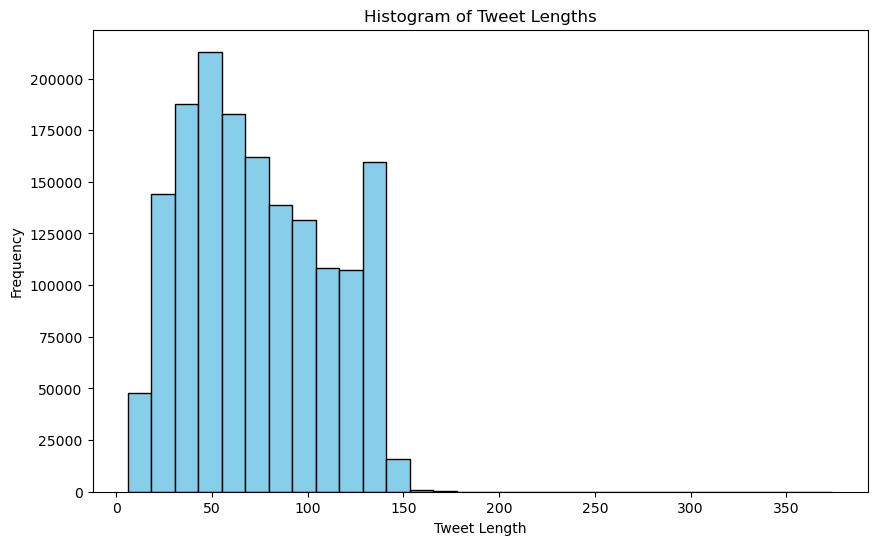

In [21]:
# Calculate tweet lengths
df['text_length'] = df['text'].apply(len)

# Plot histogram of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Let's create a function which creates a wordcloud of a given pandas Series object :
def wordCloud(data_pos, max_words):
    # call the wordcloud function to show the most top 1000 used words:
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)
    plt.axis('off')  # turn off axis
    plt.show()       # show the plot

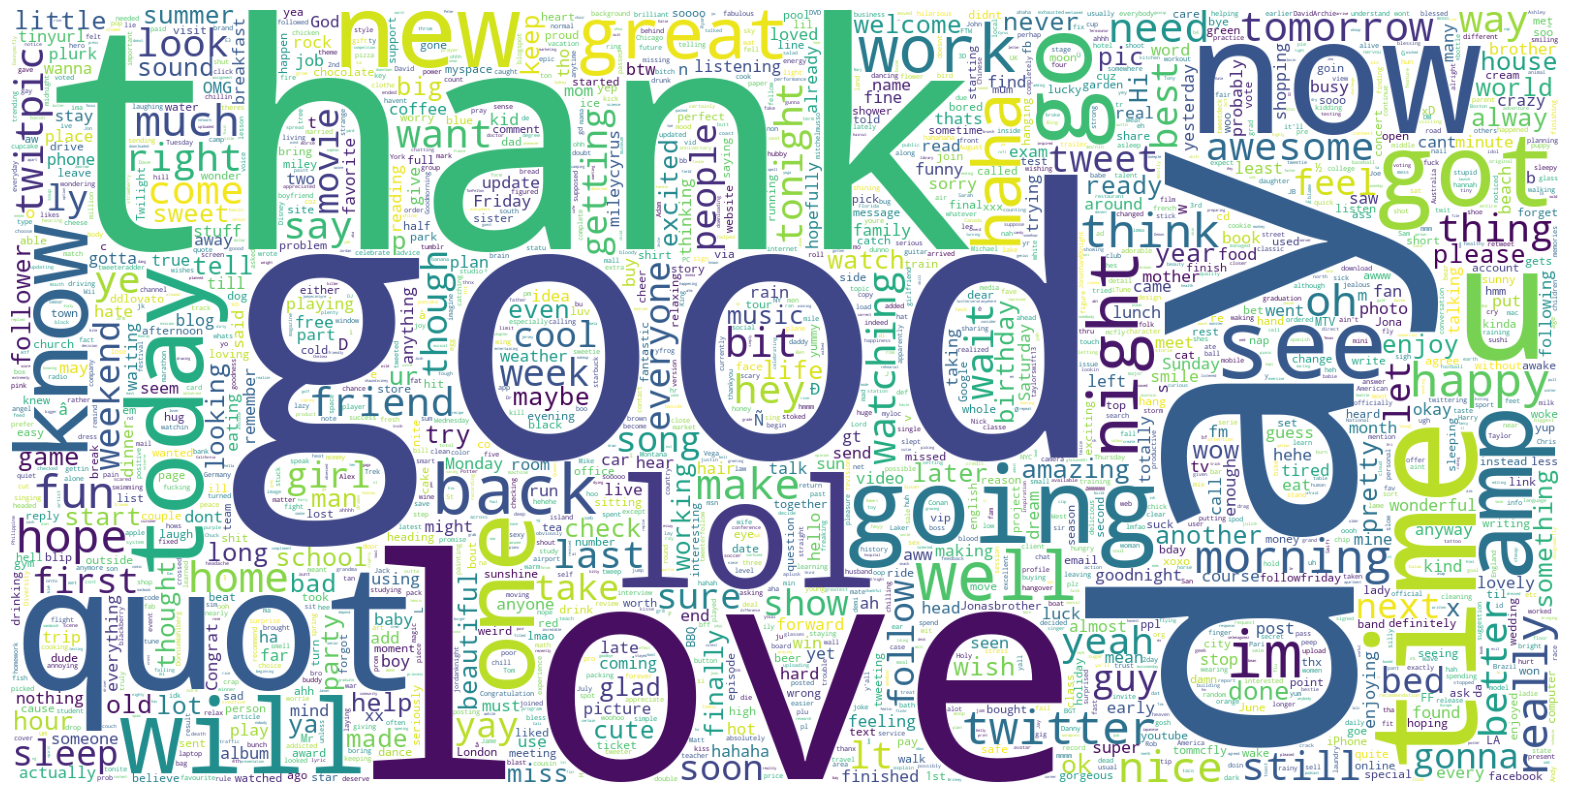

In [23]:
wordCloud(df.loc[df["target"] == 1, "text"],2000)    #for positive tweets

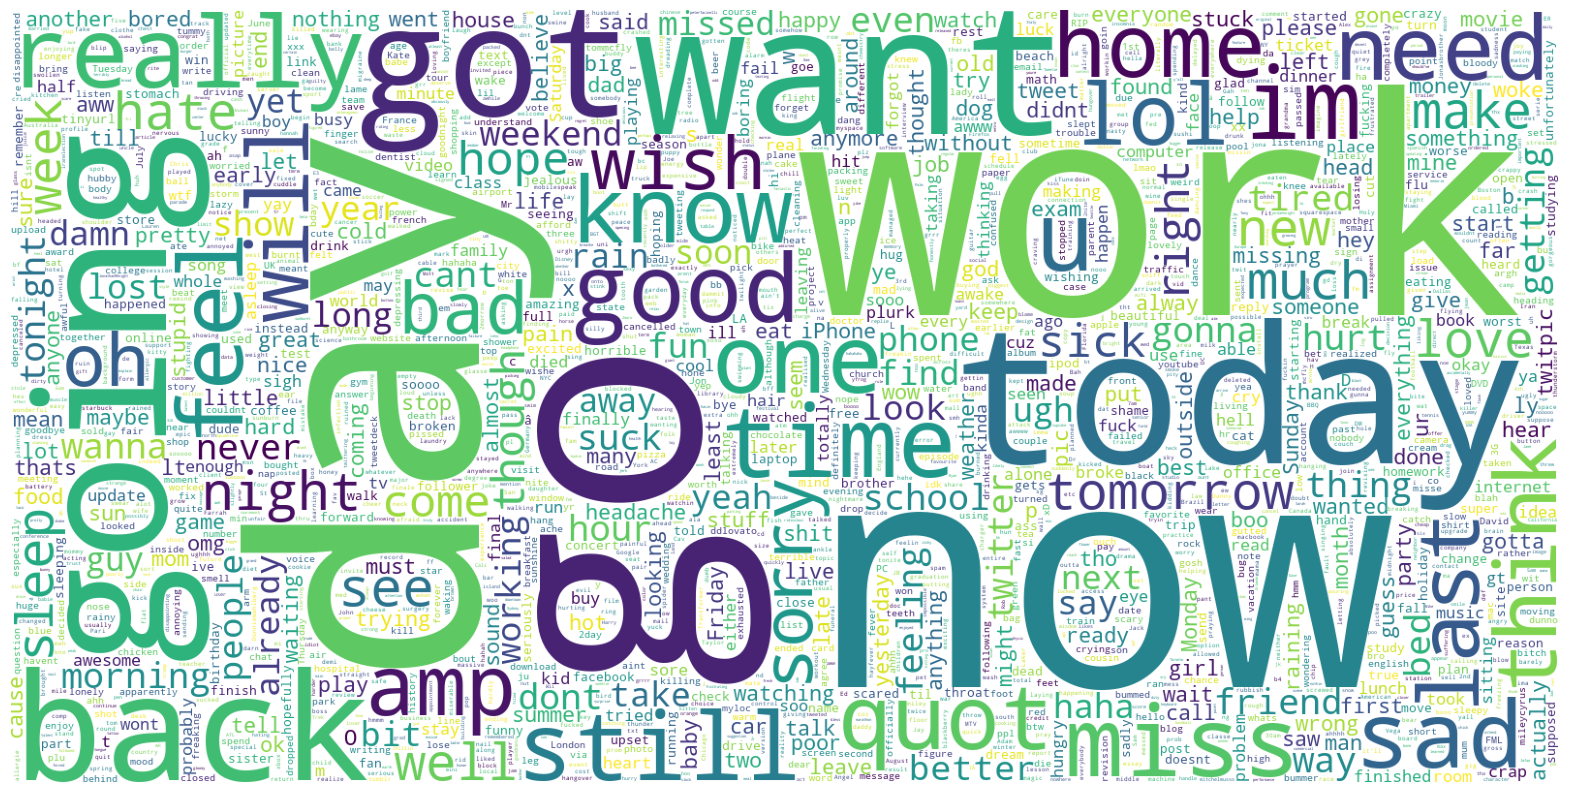

In [24]:
wordCloud(df.loc[df["target"] == 0, "text"], 2000)    #for negative tweets